In [1]:
import sys
sys.path.append('/Users/kanishkjain/opt/anaconda3/envs/gym/lib/python3.9/site-packages')

import gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Agent:
    def __init__(self, environment='CliffWalking-v0', gamma=0.1, theta=1e-6) -> None:
        
        self.env = gym.make(environment)
        self.env.reset()
        
        self.gamma = gamma
        self.theta = theta
        
        self.A_space = self.env.action_space
        self.S_space = self.env.observation_space
        self.R_range = self.env.reward_range

        self.Num_A = self.A_space.n
        self.Num_S = self.S_space.n

        self.V = np.random.rand(self.Num_S)
        self.Pi = np.random.randint(0, self.Num_A, (self.Num_S, ))
        
        if environment == 'CliffWalking-v0':
            for s in range(self.Num_S):
                for a in range(self.Num_A):
                    P, S_, R_, T = self.env.P[s][a][0]
                    if T:
                        self.env.P[s][a] = [(P, S_, 0, T)]
                
    
    def random_policy(self):
        
        self.V = np.random.rand(self.Num_S)
        self.Pi = np.random.randint(0, self.Num_A, (self.Num_S, ))
        
        returns = []
        
        for _ in range(100):
            for s in range(self.Num_S):
                self.Pi[s] = self.env.action_space.sample()
            returns.append(self.calculate_reward())
        
        return self.V, self.Pi, returns
    
    def calculate_reward(self):
        MAX_STEPS = 50
        
        S = self.env.reset()
        
        terminal = False
        step = 0
        G = 0
        while not terminal and step<MAX_STEPS:
            A = self.Pi[S]
            S, R, done, _ = self.env.step(A)
            G += R
            step += 1
            terminal = done
        return G
            
    
    def policy_evaluation(self):
        while True:
            delta = 0
            
            for s in range(self.Num_S):
                v = self.V[s]
                a = self.Pi[s]
                self.V[s] = sum([P*(R_ + self.gamma*self.V[S_]) for P, S_, R_, _ in self.env.P[s][a]])
                delta = max(delta, abs(v - self.V[s]))
            if delta < self.theta: 
                break

    def policy_improvement(self):
        policy_stable = True
        for s in range(self.Num_S):
            a = self.Pi[s]
            self.Pi[s] = np.argmax([sum([P*(R_ + self.gamma*self.V[S_]) for P, S_, R_, _ in self.env.P[s][a_]]) for a_ in range(self.Num_A)])
            if a!=self.Pi[s]:
                policy_stable = False
        return policy_stable
    
    def policy_iteration(self):
        
        S_start = self.env.reset()
        
        self.V = np.random.rand(self.Num_S)
        self.Pi = np.random.randint(0, self.Num_A, (self.Num_S, ))
        
        count = 0
        returns = []
        
        while True:
            self.policy_evaluation()
            policy_stable = self.policy_improvement()
            count += 1
            returns.append(self.calculate_reward())
            if policy_stable:
                break
        # print(f'Total {count} iterations!')
        return self.V, self.Pi, returns
    
    def value_iteration(self):
        
        S_start = self.env.reset()
        
        self.V = np.random.rand(self.Num_S)
        self.Pi = np.random.randint(0, self.Num_A, (self.Num_S, ))
        
        count = 0
        returns = []
        
        while True:
            delta = 0
            for s in range(self.Num_S):
                v = self.V[s]
                self.V[s] = max([sum([P*(R_ + self.gamma*self.V[S_]) for P, S_, R_, _ in self.env.P[s][a_]]) for a_ in range(self.Num_A)])
                self.Pi[s] = np.argmax([sum([P*(R_ + self.gamma*self.V[S_]) for P, S_, R_, _ in self.env.P[s][a_]]) for a_ in range(self.Num_A)])
                delta = max(delta, abs(v - self.V[s]))
            count += 1
            returns.append(self.calculate_reward())
            if delta < self.theta: 
                break
        # print(f'Total {count} iterations!')
        return self.V, self.Pi, returns
    
    def show_policy(self):
        
        MAX_STEPS = 100
        
        S = self.env.reset()
        
        T = False
        step = 0
        while not T and step<MAX_STEPS:
            A = self.Pi[S]
            S, R_, done, _ = self.env.step(A)
            self.env.render()
            step += 1
            T = done
        self.env.render()
        print("Finished", done)

In [3]:
N = 100

In [4]:
## Policy Iteration
policy_agent = Agent(environment='CliffWalking-v0')

policy_returns_over_N = []
for _ in range(N):
    V, Pi, returns = policy_agent.policy_iteration()
    policy_returns_over_N.append(returns)
# policy_agent.show_policy()

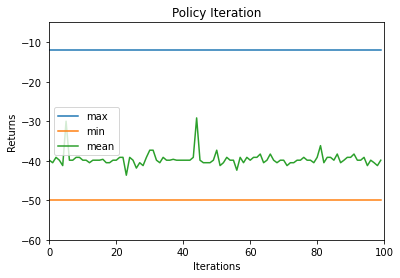

In [5]:
policy_max_return = []
policy_min_return = []
policy_mean_return = []

for return_ in policy_returns_over_N:
    policy_max_return.append(max(return_))
    policy_min_return.append(min(return_))
    policy_mean_return.append(sum(return_)/len(return_))

plt.plot(policy_max_return, label='max')
plt.plot(policy_min_return, label='min')
plt.plot(policy_mean_return, label='mean')
plt.ylim(-60, -5)
plt.xlim(0, len(policy_returns_over_N))

plt.xlabel("Iterations")
plt.ylabel("Returns")
plt.title("Policy Iteration")

plt.legend()
plt.show()

In [6]:
print("Final State Values: ", V)
print("Final Policy: ", Pi)

Final State Values:  [-1.11111111e+00 -1.11111111e+00 -1.11111111e+00 -1.11111111e+00
 -1.11111111e+00 -1.11111110e+00 -1.11111100e+00 -1.11111000e+00
 -1.11110000e+00 -1.11100000e+00 -1.11000000e+00 -1.10000000e+00
 -1.11111111e+00 -1.11111111e+00 -1.11111111e+00 -1.11111111e+00
 -1.11111110e+00 -1.11111100e+00 -1.11111000e+00 -1.11110000e+00
 -1.11100000e+00 -1.11000000e+00 -1.10000000e+00 -1.00000000e+00
 -1.11111111e+00 -1.11111111e+00 -1.11111111e+00 -1.11111110e+00
 -1.11111100e+00 -1.11111000e+00 -1.11110000e+00 -1.11100000e+00
 -1.11000000e+00 -1.10000000e+00 -1.00000000e+00  6.33266307e-30
 -1.11111111e+00 -1.11111111e+00 -1.11111111e+00 -1.11111111e+00
 -1.11111110e+00 -1.11111100e+00 -1.11111000e+00 -1.11110000e+00
 -1.11100000e+00 -1.11000000e+00  6.33266307e-30  6.33266307e-30]
Final Policy:  [1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 0
 0 0 0 0 0 0 0 0 0 1 1]


In [7]:
## Value Iteration
value_agent = Agent(environment='CliffWalking-v0')

value_returns_over_N = []
for _ in range(N):
    V, Pi, returns = value_agent.value_iteration()
    value_returns_over_N.append(returns)
    
# value_agent.show_policy()

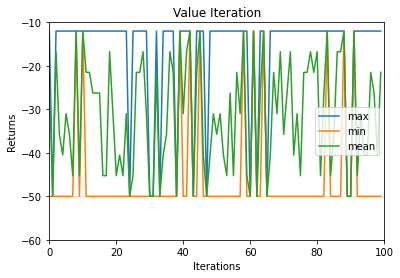

In [8]:
value_max_return = []
value_min_return = []
value_mean_return = []

for return_ in value_returns_over_N:
    value_max_return.append(max(return_))
    value_min_return.append(min(return_))
    value_mean_return.append(sum(return_)/len(return_))

plt.plot(value_max_return, label='max')
plt.plot(value_min_return, label='min')
plt.plot(value_mean_return, label='mean')
plt.ylim(-60, -10)
plt.xlim(0, len(value_returns_over_N))

plt.xlabel("Iterations")
plt.ylabel("Returns")
plt.title("Value Iteration")

plt.legend()
plt.show()

In [9]:
print("Final State Values: ", V)
print("Final Policy: ", Pi)

Final State Values:  [-1.11111109e+00 -1.11111109e+00 -1.11111109e+00 -1.11111109e+00
 -1.11111109e+00 -1.11111109e+00 -1.11111100e+00 -1.11111000e+00
 -1.11110000e+00 -1.11100000e+00 -1.11000000e+00 -1.10000000e+00
 -1.11111109e+00 -1.11111109e+00 -1.11111110e+00 -1.11111109e+00
 -1.11111109e+00 -1.11111100e+00 -1.11111000e+00 -1.11110000e+00
 -1.11100000e+00 -1.11000000e+00 -1.10000000e+00 -9.99999997e-01
 -1.11111109e+00 -1.11111110e+00 -1.11111109e+00 -1.11111109e+00
 -1.11111100e+00 -1.11111000e+00 -1.11110000e+00 -1.11100000e+00
 -1.11000000e+00 -1.10000000e+00 -9.99999997e-01  3.15879600e-09
 -1.11111110e+00 -1.11111111e+00 -1.11111111e+00 -1.11111111e+00
 -1.11111110e+00 -1.11111100e+00 -1.11111000e+00 -1.11110000e+00
 -1.11100000e+00 -1.11000000e+00  3.15879600e-09  3.15879600e-09]
Final Policy:  [1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 0
 0 0 0 0 0 0 0 0 0 1 1]


In [10]:
## Value Iteration
confused_agent = Agent(environment='CliffWalking-v0')

confused_returns_over_N = []
for _ in range(N):
    V, Pi, returns = confused_agent.random_policy()
    confused_returns_over_N.append(returns)
    
# value_agent.show_policy()

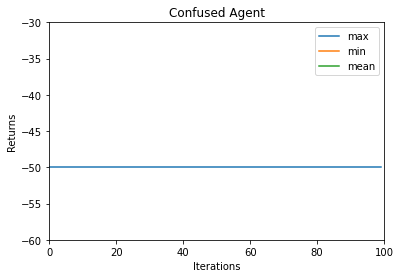

In [11]:
confused_max_return = []
confused_min_return = []
confused_mean_return = []

for return_ in confused_returns_over_N:
    confused_max_return.append(max(return_))
    confused_min_return.append(min(return_))
    confused_mean_return.append(sum(return_)/len(return_))

plt.plot(confused_max_return, label='max')
plt.plot(confused_min_return, label='min')
plt.plot(confused_mean_return, label='mean')
plt.ylim(-60, -30)
plt.xlim(0, len(confused_returns_over_N))

plt.xlabel("Iterations")
plt.ylabel("Returns")
plt.title("Confused Agent")

plt.legend()
plt.show()

In [21]:
for gamma in [0, 0.1, 0.5, 0.75,0.9999]:
    print("==============================================================================")
    policy_agent.gamma = gamma
    V, Pi, returns = policy_agent.policy_iteration()
    print(f'Policy Iterations: {len(returns)}, Gamma: {gamma}')
    print(f'Pi: {Pi}')
    print("------------------------------------------------------------------------------")
    value_agent.gamma = gamma
    V, Pi, returns = value_agent.value_iteration()
    print(f'Value Iterations: {len(returns)}, Gamma: {gamma}')
    print(f'Pi: {Pi}')
    print("==============================================================================")

Policy Iterations: 2, Gamma: 0
Pi: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 1 1]
------------------------------------------------------------------------------
Value Iterations: 2, Gamma: 0
Pi: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 1 1]
Policy Iterations: 16, Gamma: 0.1
Pi: [1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 0
 0 0 0 0 0 0 0 0 0 1 1]
------------------------------------------------------------------------------
Value Iterations: 8, Gamma: 0.1
Pi: [2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 0
 3 0 0 0 0 0 0 0 0 1 1]
Policy Iterations: 12, Gamma: 0.5
Pi: [1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 0
 0 0 0 0 0 0 0 0 0 1 1]
------------------------------------------------------------------------------
Value Iterations: 19, Gamma: 0.5
Pi: [1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1